In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def edge_based_segmentation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    return edges

def region_based_segmentation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours, thresh

def hough_transform_lines(image, edges):
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=15, maxLineGap=250)
    line_image = np.copy(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return line_image

def hough_transform_circles(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (9, 9), 2)
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=10, maxRadius=100)
    circle_image = np.copy(image)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(circle_image, (i[0], i[1]), i[2], (255, 0, 0), 2)
            cv2.circle(circle_image, (i[0], i[1]), 2, (0, 0, 255), 3)
    return circle_image

image = cv2.imread('/content/best album.jpeg')
image = cv2.resize(image, (600, 400))

In [4]:
# edge-based segmentation
edges = edge_based_segmentation(image)

# region-based segmentation
contours, thresh = region_based_segmentation(image)
region_image = image.copy()
cv2.drawContours(region_image, contours, -1, (0, 255, 0), 2)

# Hough Transform
lines_image = hough_transform_lines(image, edges)

# circles using Hough Transform
circles_image = hough_transform_circles(image)

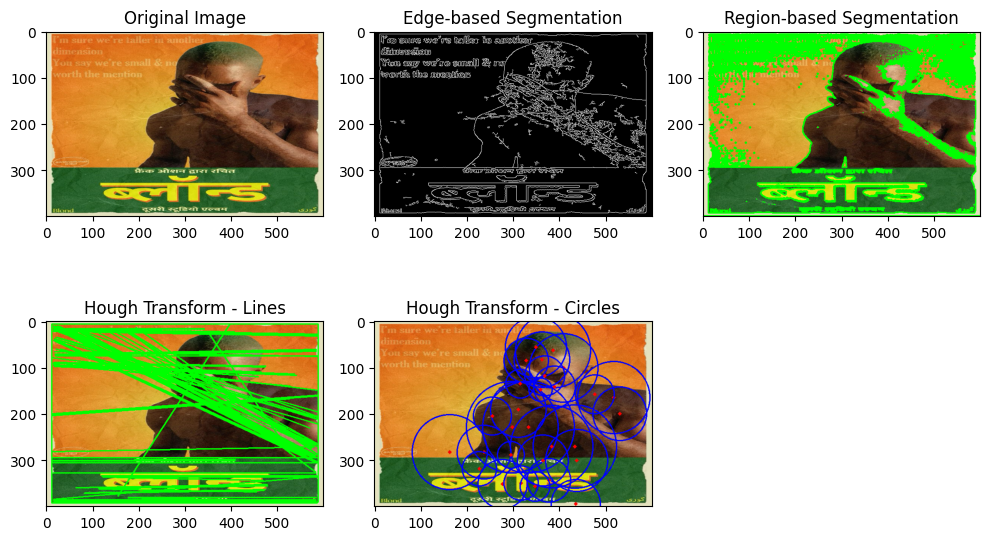

In [5]:
#  results
plt.figure(figsize=(10, 6))
plt.subplot(231), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(232), plt.imshow(edges, cmap='gray'), plt.title('Edge-based Segmentation')
plt.subplot(233), plt.imshow(cv2.cvtColor(region_image, cv2.COLOR_BGR2RGB)), plt.title('Region-based Segmentation')
plt.subplot(234), plt.imshow(cv2.cvtColor(lines_image, cv2.COLOR_BGR2RGB)), plt.title('Hough Transform - Lines')
plt.subplot(235), plt.imshow(cv2.cvtColor(circles_image, cv2.COLOR_BGR2RGB)), plt.title('Hough Transform - Circles')
plt.tight_layout()
plt.show()

In [7]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [20]:
!pip install opencv-python torch torchvision torchaudio numpy matplotlib

import cv2
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from ultralytics import YOLO

WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.11/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 7.0ms
image 2/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 1 tie, 7.7ms
Speed: 2.7ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


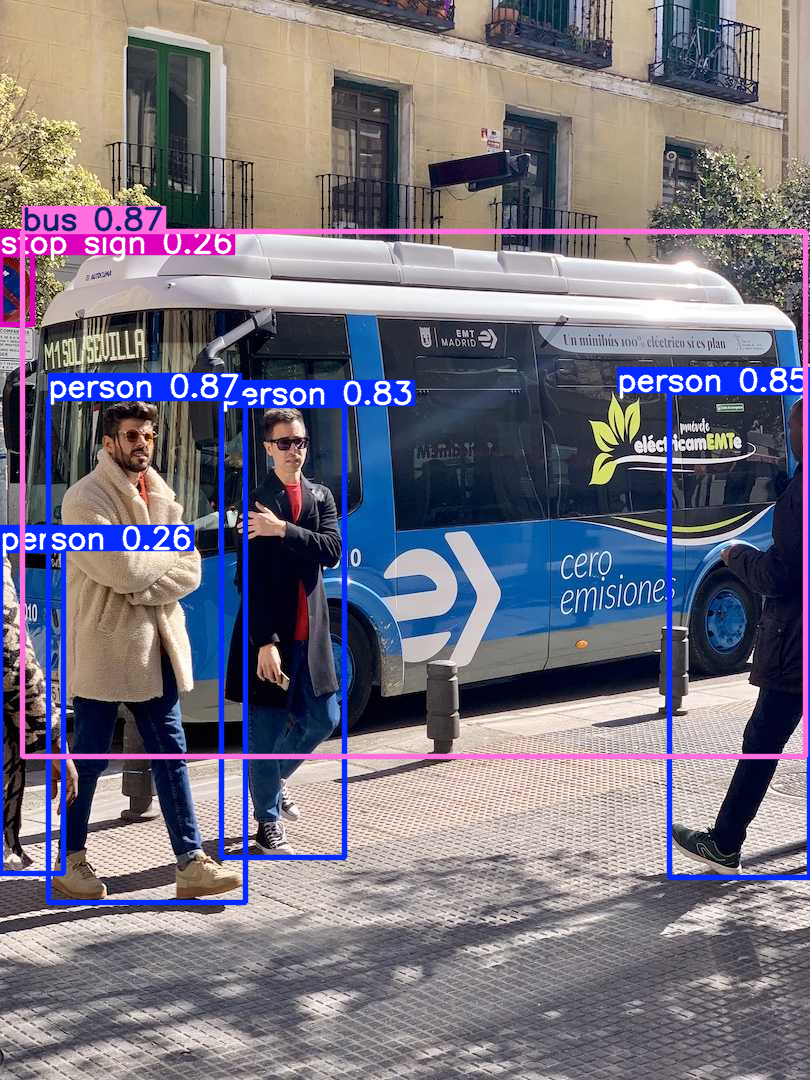

In [22]:
def yolo_object_detection():
    model = YOLO("yolov8n.pt")

    image_path = "https://ultralytics.com/images/zidane.jpg"  # Example image
    image = cv2.imread(image_path)

    # Run YOLO
    results = model(image)

    results[0].show()


# YOLO detection
yolo_object_detection()

Files already downloaded and verified


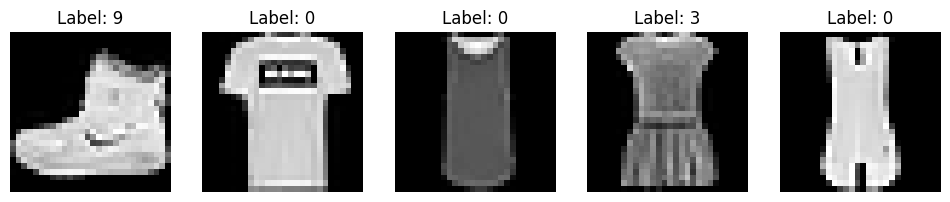

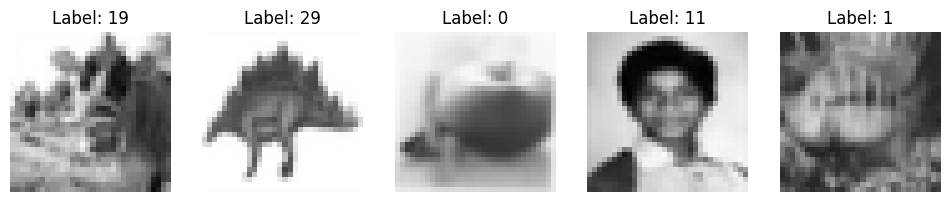

[{'boxes': tensor([], size=(0, 4)), 'labels': tensor([], dtype=torch.int64), 'scores': tensor([])}]


In [30]:
## ----------- T2.2: RCNN Object Detection ----------- ##

# datasets (Fashion MNIST and CIFAR-100)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor()
])

fashion_mnist = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
cifar100 = datasets.CIFAR100(root="./data", train=True, download=True, transform=transform)

#  sample images
def show_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(12, 3))
    for i in range(num_images):
        image, label = dataset[i]
        image_np = image.permute(1, 2, 0).numpy() if image.shape[0] == 3 else image.squeeze().numpy()
        axes[i].imshow(image_np, cmap='gray' if image.shape[0] == 1 else None)
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
    plt.show()

show_images(fashion_mnist)
show_images(cifar100)

# pre-trained  R-CNN model
model_rcnn = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=None)
model_rcnn.eval()

def detect_objects_rcnn(image):
    image_tensor = image.unsqueeze(0)
    with torch.no_grad():
        prediction = model_rcnn(image_tensor)

    return prediction

# sample image from CIFAR-100
sample_image, _ = cifar100[0]
predictions = detect_objects_rcnn(sample_image)
print(predictions)

Epoch 1, Loss: 0.3828, Accuracy: 86.20%
Epoch 2, Loss: 0.2364, Accuracy: 91.34%
Epoch 3, Loss: 0.1863, Accuracy: 93.14%
Epoch 4, Loss: 0.1454, Accuracy: 94.63%
Epoch 5, Loss: 0.1118, Accuracy: 95.87%


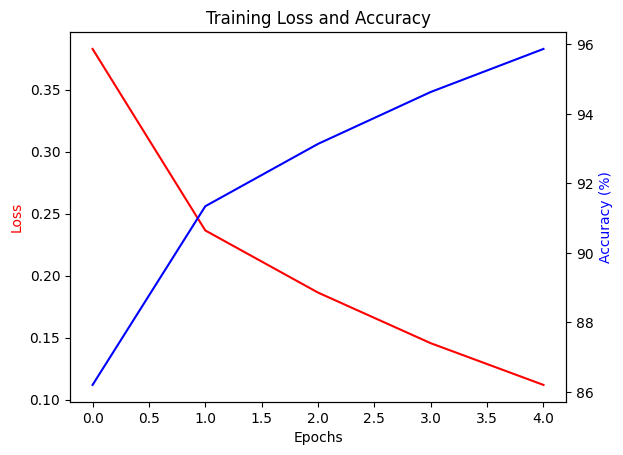

In [35]:
## ----------- Training and Evaluation ----------- ##

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()

        # output size after convolution and pooling
        self.flattened_size = 64 * 14 * 14  # (28x28 -> MaxPool(2) -> 14x14)

        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(self.relu(self.conv2(x)))
        x = torch.flatten(x, start_dim=1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Training function
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    train_loss = []
    train_acc = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        train_loss.append(epoch_loss)
        train_acc.append(epoch_acc)
        print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

    return train_loss, train_acc

# data loaders
train_loader = torch.utils.data.DataLoader(fashion_mnist, batch_size=64, shuffle=True)

# model, loss, and optimizer
model = SimpleCNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train model
loss_values, acc_values = train_model(model, train_loader, criterion, optimizer, num_epochs=5)

# accuracy and loss
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(loss_values, 'r-', label='Loss')
ax2.plot(acc_values, 'b-', label='Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='r')
ax2.set_ylabel('Accuracy (%)', color='b')
plt.title('Training Loss and Accuracy')
plt.show()